In [ ]:
import pandas as pd

df = pd.read_csv('dataset_complexmethod.csv')
df.head()

,file,project,version,loc,lloc,sloc,comments,multi,blank,cyclo,...,V,D,E,T,B,cbo,lcom,DIT,rfc,ComplexMethod
0,coba.py,django-2.2,2.2,6.0,3.0,3.0,1.0,0.0,2.0,0.0,...,0.000,0.000,0.000,0.000,0.000000,0.0,0.0,0.0,0.0,0
1,setup.py,django-2.2,2.2,138.0,30.0,104.0,9.0,0.0,25.0,1.0,...,39.863,2.667,106.302,5.906,0.013288,0.0,0.0,0.0,0.0,0
2,django\shortcuts.py,django-2.2,2.2,158.0,62.0,66.0,9.0,52.0,31.0,23.0,...,116.692,2.125,247.971,13.776,0.038897,0.0,0.0,0.0,0.0,0
3,django\__init__.py,django-2.2,2.2,24.0,13.0,14.0,0.0,5.0,5.0,3.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0
4,django\__main__.py,django-2.2,2.2,9.0,4.0,3.0,0.0,4.0,2.0,0.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0


# **PREPROCESSING**

In [ ]:
df['project'].unique()

array(['django-2.2', 'django-3.2', 'django-4.2', 'django-5.2',
       'matplotlib-3.10.0', 'matplotlib-3.3.0', 'matplotlib-3.4.0',
       'matplotlib-3.6.0', 'matplotlib-3.8.0', 'numpy-1.21.0',
       'numpy-1.23.0', 'numpy-1.25.0', 'numpy-2.0.0', 'numpy-2.1.0',
       'scipy-1.11.0', 'scipy-1.13.0', 'scipy-1.14.0', 'scipy-1.7.0',
       'scipy-1.9.0'], dtype=object)

In [ ]:
df['project'] = df['project'].str.replace(r'-.*$', '', regex=True)

In [ ]:
df.head()

,file,project,version,loc,lloc,sloc,comments,multi,blank,cyclo,...,V,D,E,T,B,cbo,lcom,DIT,rfc,ComplexMethod
0,coba.py,django,2.2,6.0,3.0,3.0,1.0,0.0,2.0,0.0,...,0.000,0.000,0.000,0.000,0.000000,0.0,0.0,0.0,0.0,0
1,setup.py,django,2.2,138.0,30.0,104.0,9.0,0.0,25.0,1.0,...,39.863,2.667,106.302,5.906,0.013288,0.0,0.0,0.0,0.0,0
2,django\shortcuts.py,django,2.2,158.0,62.0,66.0,9.0,52.0,31.0,23.0,...,116.692,2.125,247.971,13.776,0.038897,0.0,0.0,0.0,0.0,0
3,django\__init__.py,django,2.2,24.0,13.0,14.0,0.0,5.0,5.0,3.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0
4,django\__main__.py,django,2.2,9.0,4.0,3.0,0.0,4.0,2.0,0.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0


In [ ]:
df['project'].unique()

array(['django', 'matplotlib', 'numpy', 'scipy'], dtype=object)

In [ ]:
df.isnull().sum()

,0
file,0
project,0
version,0
loc,0
lloc,0
sloc,0
comments,0
multi,0
blank,0
cyclo,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   file           22805 non-null  object 
 1   project        22805 non-null  object 
 2   version        22805 non-null  object 
 3   loc            22805 non-null  float64
 4   lloc           22805 non-null  float64
 5   sloc           22805 non-null  float64
 6   comments       22805 non-null  float64
 7   multi          22805 non-null  float64
 8   blank          22805 non-null  float64
 9   cyclo          22805 non-null  float64
 10  wmc            22805 non-null  float64
 11  η1             22805 non-null  float64
 12  η2             22805 non-null  float64
 13  N1             22805 non-null  float64
 14  N2             22805 non-null  float64
 15  η              22805 non-null  float64
 16  N              22805 non-null  float64
 17  N_hat          22805 non-null  float64
 18  V     

# **SPLIT DATA**

In [ ]:
from sklearn.model_selection import train_test_split

# save file, ver, project in metadata
meta = df[["file", "version", "project"]]


X = df.drop(columns=["file", "version", "project", "ComplexMethod"])
y = df["ComplexMethod"]


X_train, X_test, y_train, y_test, meta_train, meta_test = train_test_split(
    X, y, meta, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

print("Fitur final:", X_train.columns.tolist())

Fitur final: ['loc', 'lloc', 'sloc', 'comments', 'multi', 'blank', 'wmc', 'η1', 'η2', 'N1', 'N2', 'η', 'N', 'N_hat', 'V', 'D', 'E', 'T', 'B', 'cbo', 'lcom', 'DIT', 'rfc']


# **FEATURE SCALING**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class ModifiedZScoreScaler(BaseEstimator, TransformerMixin):
    """
    Modified Z-score scaling (median & MAD).
    Cocok untuk data skewed / outlier-heavy.
    """
    def fit(self, X, y=None):
        self.medians_ = X.median()
        self.mads_ = (np.abs(X - self.medians_)).median()
        self.mads_ = self.mads_.replace(0, 1e-9)  # hindari division by zero
        return self

    def transform(self, X):
        return 0.6745 * (X - self.medians_) / self.mads_

In [ ]:
# before scaling
print("\n=== Sebelum Scaling ===")
print(X_train.head())

# Scaling
scaler = ModifiedZScoreScaler()
X_train_scaled = scaler.fit_transform(X_train)

# after scaling
print("\n=== Setelah Scaling ===")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())


=== Sebelum Scaling ===
        loc  lloc  sloc  comments  multi  blank  wmc   η1    η2    N1  ...  \
8971   23.0  15.0  15.0       2.0    0.0    6.0  9.0  0.0   0.0   0.0  ...   
14900  32.0  18.0  17.0       3.0    7.0    6.0  0.0  6.0  16.0  12.0  ...   
5074    0.0   0.0   0.0       0.0    0.0    0.0  0.0  0.0   0.0   0.0  ...   
2336    0.0   0.0   0.0       0.0    0.0    0.0  0.0  0.0   0.0   0.0  ...   
15664  22.0  17.0  17.0       2.0    0.0    3.0  7.0  2.0   4.0   2.0  ...   

       N_hat       V    D        E       T         B   cbo  lcom  DIT  rfc  
8971    0.00    0.00  0.0    0.000   0.000  0.000000  14.0   1.0  1.0  3.0  
14900  79.51  160.54  4.5  722.428  40.135  0.053513   0.0   0.0  0.0  0.0  
5074    0.00    0.00  0.0    0.000   0.000  0.000000   0.0   0.0  0.0  0.0  
2336    0.00    0.00  0.0    0.000   0.000  0.000000   0.0   0.0  0.0  0.0  
15664  10.00   15.51  1.0   15.510   0.862  0.005170   4.0   1.0  1.0  5.0  

[5 rows x 23 columns]

=== Setelah Scaling 

# **FEATURE SELECTION**

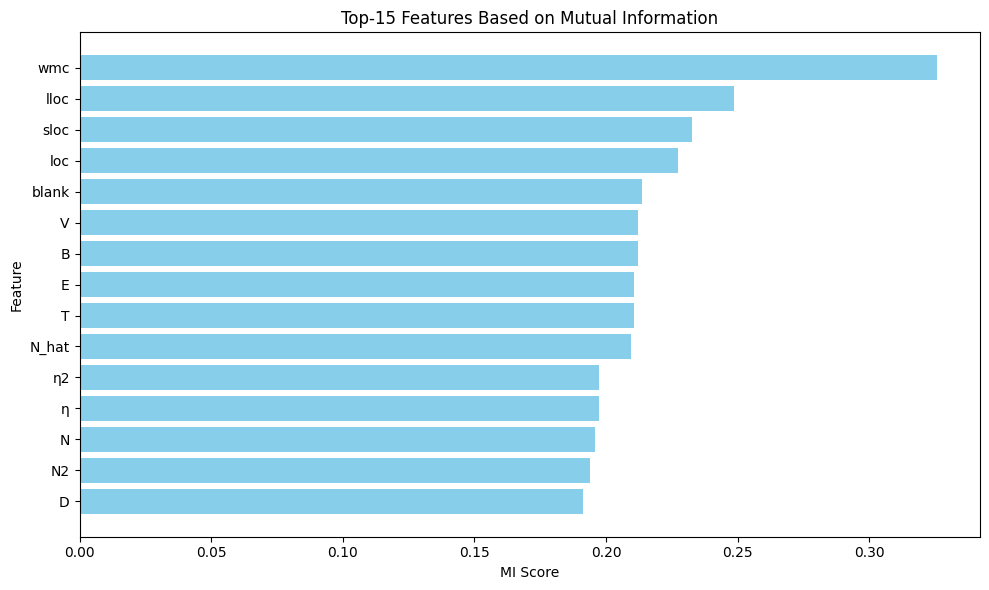

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np

def select_topk_features_MI(X, y, k):
    """
    Feature selection menggunakan Mutual Information.
    Mengambil k fitur teratas berdasarkan skor MI.
    """
    scores = mutual_info_classif(X, y, random_state=42)
    mi_series = pd.Series(scores, index=X.columns)
    selected = mi_series.nlargest(k).index.tolist()
    return selected, scores

selected_features, scores = select_topk_features_MI(X_train, y_train, k=15)

mi_df = pd.DataFrame({
    "feature": X_train.columns,
    "mi_score": scores
}).sort_values("mi_score", ascending=True)

# selected feature
mi_selected_df = mi_df[mi_df["feature"].isin(selected_features)]

plt.figure(figsize=(10, 6))
plt.barh(mi_selected_df["feature"], mi_selected_df["mi_score"], color='skyblue')
plt.title("Top-15 Features Based on Mutual Information")
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# **MODELING MACHINE LEARNINNG**

# **Random Forest**

In [ ]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix
import numpy as np

n_estimators_list = [100, 200, 300]

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

mean_acc_results = []
mean_mcc_results = []

for n in n_estimators_list:

    print("\n\n======================")
    print(f"   n_estimators = {n}")
    print("======================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []
    fold_counter = 1

    # Cross Validation for each n_estimators
    for train_idx, test_idx in rskf.split(X_train, y_train):


        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]


        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]


        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)


        model = RandomForestClassifier(
            n_estimators=n,
            max_depth=2,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )

        # Timing Training
        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        # Timing Predict
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        # Evaluation
        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediksi Time:  {pred_time:.5f} sec")
        fold_counter += 1

    # Result of each n_estimtor
    mean_acc_results.append(np.mean(acc_all))
    mean_mcc_results.append(np.mean(mcc_all))
    mean_train = np.mean(train_time_all)
    mean_pred = np.mean(predict_time_all)

    print("\n>>> RESULT for n_estimators =", n)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {mean_train:.5f} sec")
    print(f"Mean Predict Time:  {mean_pred:.5f} sec")



   n_estimators = 100

===== Fold 1 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'N', 'η', 'η2', 'N2', 'N1']
Accuracy: 0.96657
MCC: 0.84766
Training Time:  0.65156 sec
Prediksi Time:  0.04657 sec

===== Fold 2 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.96958
MCC: 0.85774
Training Time:  0.59759 sec
Prediksi Time:  0.03697 sec

===== Fold 3 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'E', 'T', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.96410
MCC: 0.83650
Training Time:  0.60761 sec
Prediksi Time:  0.03509 sec

===== Fold 4 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.96163
MCC: 0.82722
Training Time:  0.93394 sec
Prediksi Time:  0.03616 sec

===== Fold 5 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', '

**Visualitation of Evaluation Result of Each n_estimator**

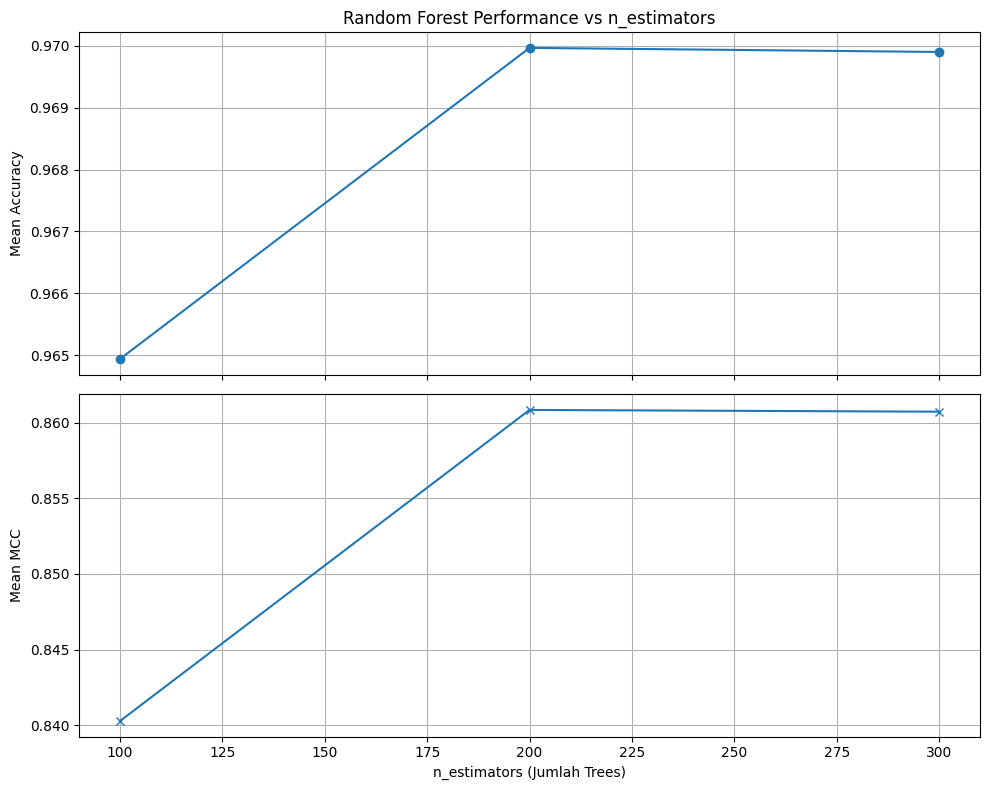

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Accuracy
axes[0].plot(n_estimators_list, mean_acc_results, marker='o')
axes[0].set_ylabel('Mean Accuracy')
axes[0].set_title('Random Forest Performance vs n_estimators')
axes[0].grid(True)

#  MCC
axes[1].plot(n_estimators_list, mean_mcc_results, marker='x')
axes[1].set_xlabel('n_estimators (Jumlah Trees)')
axes[1].set_ylabel('Mean MCC')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# **KNN**

In [ ]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef
import numpy as np

n_neighbors_list = [1, 3, 5, 7, 9, 11]

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

mean_acc_knn = []
mean_mcc_knn = []
mean_train_knn = []
mean_pred_knn = []

for k in n_neighbors_list:

    print("\n\n======================")
    print(f"        K = {k}")
    print("======================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []

    fold_counter = 1

    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        model = KNeighborsClassifier(
            n_neighbors=k,
            weights='distance',
            p=2
        )

        # Training time
        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        # Prediction time
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} =====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediction Time: {pred_time:.5f} sec")
        fold_counter += 1


    mean_acc_knn.append(np.mean(acc_all))
    mean_mcc_knn.append(np.mean(mcc_all))
    mean_train_knn.append(np.mean(train_time_all))
    mean_pred_knn.append(np.mean(predict_time_all))

    print("\n>>> RESULT for K =", k)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {np.mean(train_time_all):.5f} sec")
    print(f"Mean Predict Time:  {np.mean(predict_time_all):.5f} sec")



        K = 1

===== Fold 1 =====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'N', 'η', 'η2', 'N2', 'N1']
Accuracy: 0.98191
MCC: 0.89761
Training Time:  0.02989 sec
Prediction Time: 0.05832 sec

===== Fold 2 =====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.98246
MCC: 0.89928
Training Time:  0.02897 sec
Prediction Time: 0.05808 sec

===== Fold 3 =====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'E', 'T', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.98246
MCC: 0.89993
Training Time:  0.05576 sec
Prediction Time: 0.11707 sec

===== Fold 4 =====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.98027
MCC: 0.88766
Training Time:  0.03138 sec
Prediction Time: 0.07241 sec

===== Fold 5 =====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 

**Visualitation of Evaluation Result of n_neighbors**

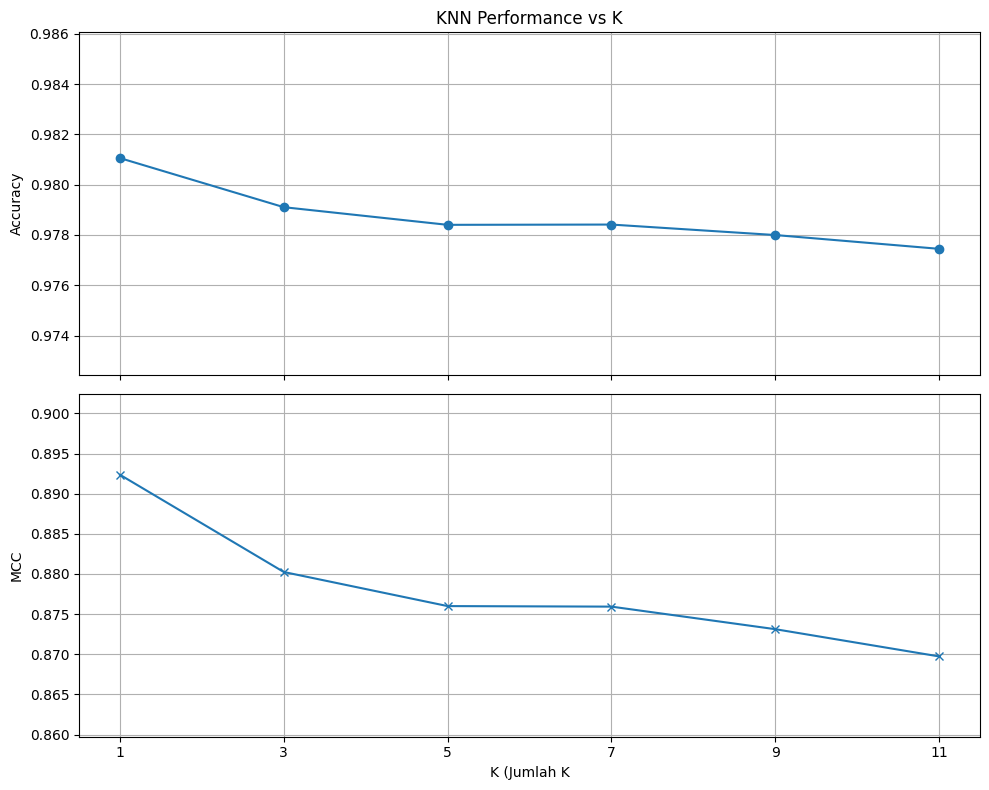

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Accuracy
axes[0].plot(n_neighbors_list, mean_acc_knn, marker='o')
axes[0].set_ylabel("Accuracy")
axes[0].set_title("KNN Performance vs K")
axes[0].grid(True)
axes[0].set_ylim(min(mean_acc_knn)-0.005, max(mean_acc_knn)+0.005)

#MCC
axes[1].plot(n_neighbors_list, mean_mcc_knn, marker='x')
axes[1].set_xlabel("K (Jumlah K")
axes[1].set_ylabel("MCC")
axes[1].grid(True)
axes[1].set_ylim(min(mean_mcc_knn)-0.01, max(mean_mcc_knn)+0.01)

plt.xticks(n_neighbors_list)

plt.tight_layout()
plt.show()

# **Logistic Regresion**

In [ ]:
import time
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, matthews_corrcoef

C_list = [0.001, 0.01, 0.1, 1, 10, 100]

mean_acc_lr = []
mean_mcc_lr = []

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

print("\n===============================")
print("  LOGISTIC REGRESSION EVALUATION")
print("===============================\n")

for C in C_list:

    print("\n\n=====================")
    print(f"        C = {C}")
    print("=====================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []
    fold_counter = 1

    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]


        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]


        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        model = LogisticRegression(C=C, max_iter=3000, solver='lbfgs')

        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediction Time:{pred_time:.5f} sec")

        fold_counter += 1

    mean_acc_lr.append(np.mean(acc_all))
    mean_mcc_lr.append(np.mean(mcc_all))

    print("\n>>> RESULT for C =", C)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {np.mean(train_time_all):.5f} sec")
    print(f"Mean Predict Time:  {np.mean(predict_time_all):.5f} sec")


  LOGISTIC REGRESSION EVALUATION



        C = 0.001

===== Fold 1 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'N', 'η', 'η2', 'N2', 'N1']
Accuracy: 0.99507
MCC: 0.97209
Training Time:  2.07672 sec
Prediction Time:0.00299 sec

===== Fold 2 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.99315
MCC: 0.96108
Training Time:  0.79382 sec
Prediction Time:0.00200 sec

===== Fold 3 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'E', 'T', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.99013
MCC: 0.94366
Training Time:  1.17595 sec
Prediction Time:0.00183 sec

===== Fold 4 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.99342
MCC: 0.96276
Training Time:  1.01518 sec
Prediction Time:0.00181 sec

===== Fold 5 ====
Selected features: ['wmc', 'lloc', 'sl

**Visualitation of Evaluation Result of C**

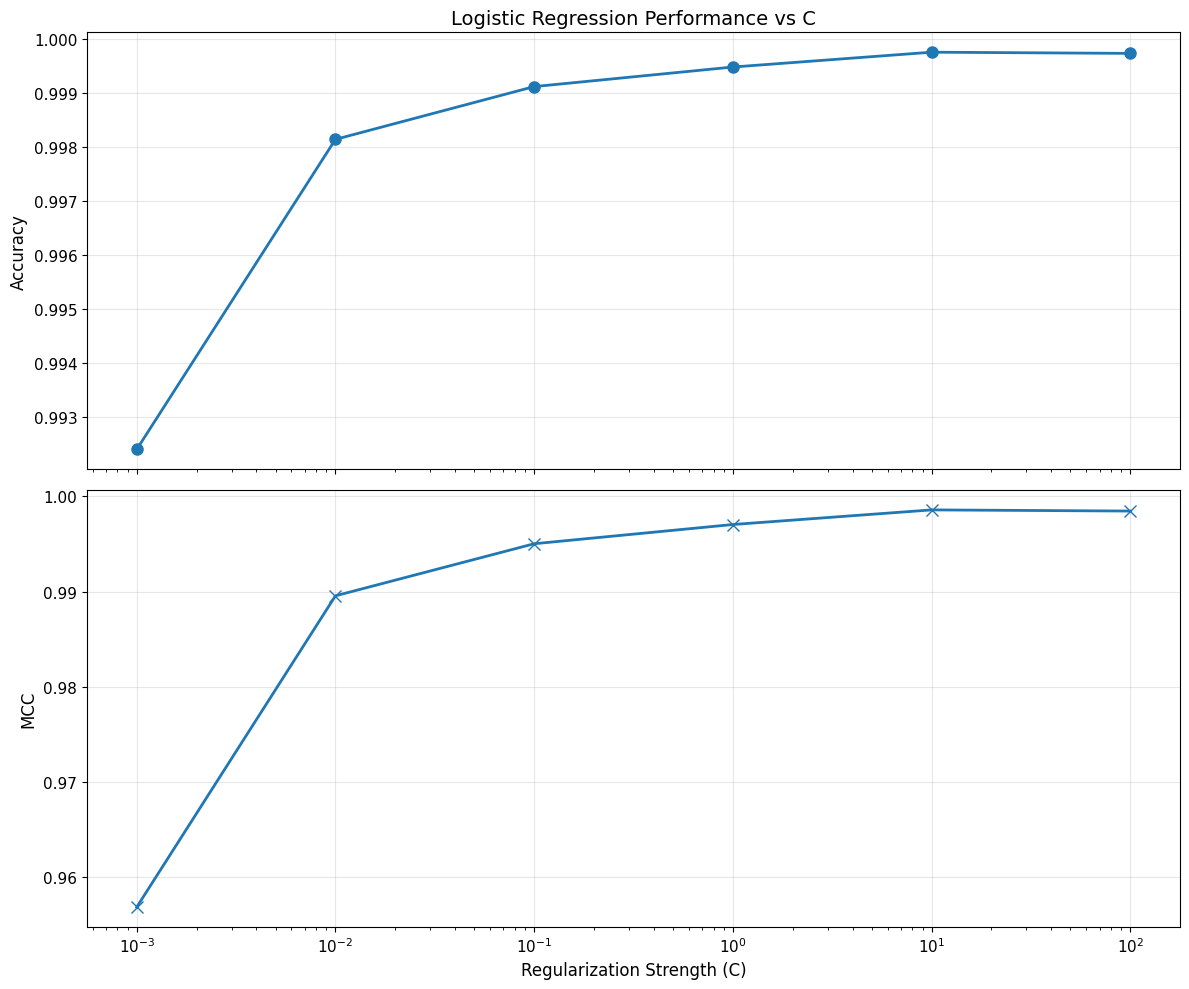

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Accuracy
axes[0].plot(C_list, mean_acc_lr, marker='o', linewidth=2, markersize=8)
axes[0].set_xscale('log')
axes[0].set_ylabel("Accuracy", fontsize=12)
axes[0].set_title("Logistic Regression Performance vs C", fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='both', labelsize=11)

# MCC
axes[1].plot(C_list, mean_mcc_lr, marker='x', linewidth=2, markersize=8)
axes[1].set_xscale('log')
axes[1].set_xlabel("Regularization Strength (C)", fontsize=12)
axes[1].set_ylabel("MCC", fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='both', labelsize=11)

plt.xticks(C_list)

plt.tight_layout()
plt.show()

# **MLP**

In [ ]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix
import numpy as np

hidden_layer_sizes_list = [4, 8, 16, 32, 64, 100]

mean_acc_mlp = []
mean_mcc_mlp = []
train_time_all = []
predict_time_all = []
fold_counter = 1

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

print("\n===============================")
print("      MLP CLASSIFIER EVALUATION")
print("===============================\n")

for h in hidden_layer_sizes_list:

    print("\n\n======================")
    print(f"  Hidden Layer = {h}")
    print("======================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []

    fold_counter = 1


    for train_idx, test_idx in rskf.split(X_train, y_train):


        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]


        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        # ==== MLP Model ====
        model = MLPClassifier(
            hidden_layer_sizes=(h,),
            activation='relu',
            solver='adam',
            max_iter=2000,
            random_state=42
        )

        #Timing Training
        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        #Timing Predict
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        model.fit(X_train_scaled, y_train_fold)
        y_pred = model.predict(X_test_scaled)

        # Evaluasi
        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediksi Time:  {pred_time:.5f} sec")
        fold_counter += 1


    mean_acc_mlp.append(np.mean(acc_all))
    mean_mcc_mlp.append(np.mean(mcc_all))
    mean_train = np.mean(train_time_all)
    mean_pred = np.mean(predict_time_all)

    print("\n>>> RESULT for Hidden Layer =", hidden_layer_sizes_list)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {mean_train:.5f} sec")
    print(f"Mean Predict Time:  {mean_pred:.5f} sec")


      MLP CLASSIFIER EVALUATION



  Hidden Layer = 4

===== Fold 1 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'N', 'η', 'η2', 'N2', 'N1']
Accuracy: 0.97506
MCC: 0.85288
Training Time:  2.02688 sec
Prediksi Time:  0.00261 sec

===== Fold 2 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.99178
MCC: 0.95378
Training Time:  2.17005 sec
Prediksi Time:  0.00177 sec

===== Fold 3 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'E', 'T', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.97095
MCC: 0.86307
Training Time:  1.92735 sec
Prediksi Time:  0.00177 sec

===== Fold 4 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.98657
MCC: 0.92298
Training Time:  1.52378 sec
Prediksi Time:  0.00180 sec

===== Fold 5 ====
Selected features: ['wmc', 'lloc', 'sl

**Visualitation of Evaluation Result of hidden_layer**

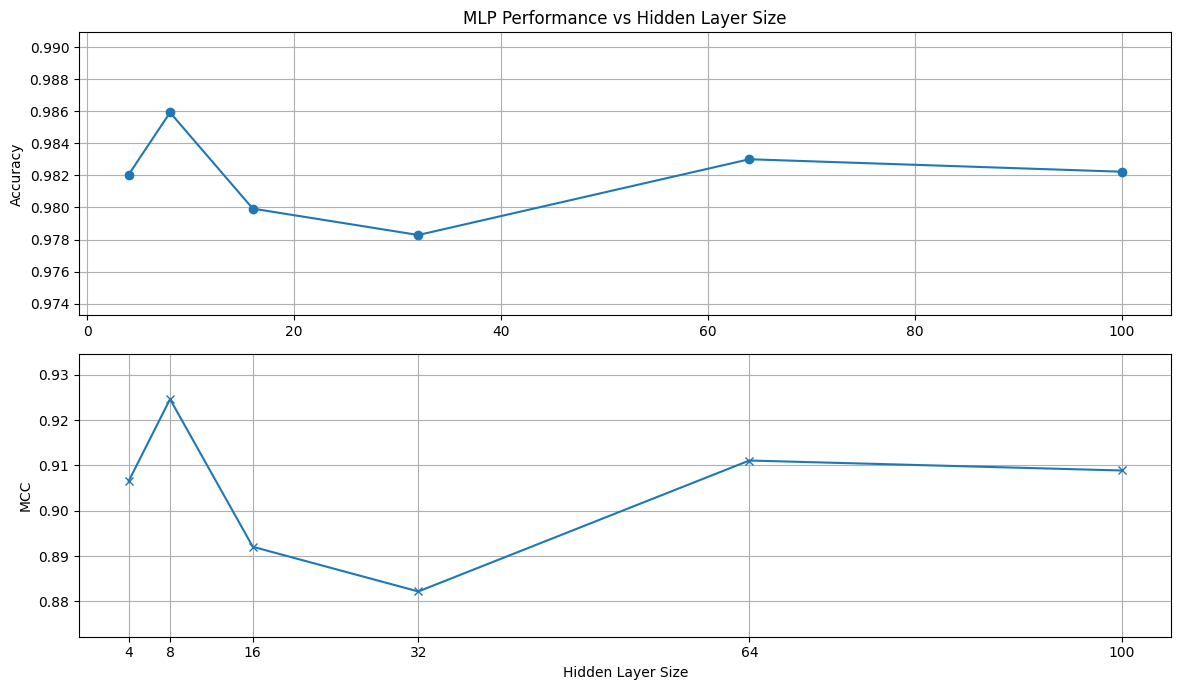

In [ ]:
plt.figure(figsize=(12, 7))

plt.subplot(2, 1, 1)
plt.plot(hidden_layer_sizes_list, mean_acc_mlp, marker='o')
plt.title("MLP Performance vs Hidden Layer Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.ylim(min(mean_acc_mlp) - 0.005, max(mean_acc_mlp) + 0.005)


plt.subplot(2, 1, 2)
plt.plot(hidden_layer_sizes_list, mean_mcc_mlp, marker='x')
plt.xlabel("Hidden Layer Size")
plt.ylabel("MCC")
plt.grid(True)
plt.ylim(min(mean_mcc_mlp) - 0.01, max(mean_mcc_mlp) + 0.01)

plt.xticks(hidden_layer_sizes_list)

plt.tight_layout()
plt.show()

# **TABNET**

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.4 MB/s eta 0:00:00


In [ ]:
import time
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, matthews_corrcoef
import numpy as np
import torch
import pandas as pd

# attention and decision
n_d_a_list = [8, 16, 32, 64]

mean_acc_tabnet = []
mean_mcc_tabnet = []

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

print("\n===============================")
print("         TABNET EVALUATION")
print("===============================\n")

for dim in n_d_a_list:

    print(f"\n\n======================\n  n_d = n_a = {dim}\n======================")

    acc_all = []
    mcc_all = []
    train_time_all_fold = []
    predict_time_all_fold = []
    fold_counter = 1

    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx].values
        y_test_fold  = y_train.iloc[test_idx].values

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)

        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        X_train_scaled_tabnet = X_train_scaled.values if isinstance(X_train_scaled, pd.DataFrame) else X_train_scaled
        X_test_scaled_tabnet = X_test_scaled.values if isinstance(X_test_scaled, pd.DataFrame) else X_test_scaled

        # Tabnet
        model = TabNetClassifier(
            n_d=dim,
            n_a=dim,
            n_steps=5,
            gamma=1.3,
            lambda_sparse=1e-4,
            optimizer_fn=torch.optim.Adam,
            optimizer_params=dict(lr=1e-3),
            verbose=0,
            seed=42
        )

        # Timing Training
        start_train = time.time()
        model.fit(
            X_train_scaled_tabnet, y_train_fold,
            eval_set=[(X_test_scaled_tabnet, y_test_fold)],
            eval_metric=['accuracy'],
            max_epochs=100,
            patience=30
        )
        train_time = time.time() - start_train

        # Timing Predict
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled_tabnet)
        pred_time = time.time() - start_pred

        # Evaluation
        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all_fold.append(train_time)
        predict_time_all_fold.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediksi Time:  {pred_time:.5f} sec")
        fold_counter += 1

    mean_acc_tabnet.append(np.mean(acc_all))
    mean_mcc_tabnet.append(np.mean(mcc_all))
    mean_train = np.mean(train_time_all_fold)
    mean_pred = np.mean(predict_time_all_fold)

    print(f"\n>>> RESULT for n_d = n_a = {dim}")
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {mean_train:.5f} sec")
    print(f"Mean Predict Time:  {mean_pred:.5f} sec")


         TABNET EVALUATION



  n_d = n_a = 8

Early stopping occurred at epoch 48 with best_epoch = 18 and best_val_0_accuracy = 0.95725


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'N', 'η', 'η2', 'N2', 'N1']
Accuracy: 0.95725
MCC: 0.75398
Training Time:  64.58636 sec
Prediksi Time:  0.10990 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.96026


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.96026
MCC: 0.78739
Training Time:  53.98590 sec
Prediksi Time:  0.10840 sec

Early stopping occurred at epoch 42 with best_epoch = 12 and best_val_0_accuracy = 0.95889


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'E', 'T', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.95889
MCC: 0.78226
Training Time:  49.09214 sec
Prediksi Time:  0.10922 sec

Early stopping occurred at epoch 42 with best_epoch = 12 and best_val_0_accuracy = 0.9567


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.95670
MCC: 0.77040
Training Time:  49.15911 sec
Prediksi Time:  0.10958 sec

Early stopping occurred at epoch 46 with best_epoch = 16 and best_val_0_accuracy = 0.94901


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.94901
MCC: 0.71551
Training Time:  54.09912 sec
Prediksi Time:  0.11051 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.95588


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'T', 'E', 'V', 'B', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.95588
MCC: 0.75915
Training Time:  51.43898 sec
Prediksi Time:  0.10567 sec

Early stopping occurred at epoch 46 with best_epoch = 16 and best_val_0_accuracy = 0.95889


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.95889
MCC: 0.79868
Training Time:  54.47796 sec
Prediksi Time:  0.10533 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.95259


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.95259
MCC: 0.74255
Training Time:  51.46325 sec
Prediksi Time:  0.10463 sec

Early stopping occurred at epoch 42 with best_epoch = 12 and best_val_0_accuracy = 0.96492


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.96492
MCC: 0.80988
Training Time:  49.23812 sec
Prediksi Time:  0.11000 sec

Early stopping occurred at epoch 45 with best_epoch = 15 and best_val_0_accuracy = 0.9534


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'N', 'η', 'η2', 'N2', 'D']
Accuracy: 0.95340
MCC: 0.74262
Training Time:  52.73592 sec
Prediksi Time:  0.11770 sec

Early stopping occurred at epoch 47 with best_epoch = 17 and best_val_0_accuracy = 0.96492


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'N', 'η', 'η2', 'N2', 'N1']
Accuracy: 0.96492
MCC: 0.80942
Training Time:  54.74963 sec
Prediksi Time:  0.11191 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.95917


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.95917
MCC: 0.78470
Training Time:  51.74457 sec
Prediksi Time:  0.10505 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.95944


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.95944
MCC: 0.79725
Training Time:  51.97856 sec
Prediksi Time:  0.13261 sec

Early stopping occurred at epoch 47 with best_epoch = 17 and best_val_0_accuracy = 0.95259


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'η', 'E', 'T', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.95259
MCC: 0.73972
Training Time:  54.89187 sec
Prediksi Time:  0.10785 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.96601


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.96601
MCC: 0.81034
Training Time:  52.53571 sec
Prediksi Time:  0.10636 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.95643


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.95643
MCC: 0.76409
Training Time:  52.35374 sec
Prediksi Time:  0.10450 sec

Early stopping occurred at epoch 50 with best_epoch = 20 and best_val_0_accuracy = 0.95643


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.95643
MCC: 0.73705
Training Time:  60.37265 sec
Prediksi Time:  0.11036 sec

Early stopping occurred at epoch 45 with best_epoch = 15 and best_val_0_accuracy = 0.95369


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.95369
MCC: 0.74783
Training Time:  52.57710 sec
Prediksi Time:  0.11376 sec

Early stopping occurred at epoch 46 with best_epoch = 16 and best_val_0_accuracy = 0.95725


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'E', 'T', 'B', 'V', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.95725
MCC: 0.75148
Training Time:  54.81379 sec
Prediksi Time:  0.15952 sec

Early stopping occurred at epoch 46 with best_epoch = 16 and best_val_0_accuracy = 0.95696


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.95696
MCC: 0.78928
Training Time:  53.43624 sec
Prediksi Time:  0.11291 sec

Early stopping occurred at epoch 45 with best_epoch = 15 and best_val_0_accuracy = 0.963


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.96300
MCC: 0.79378
Training Time:  52.76246 sec
Prediksi Time:  0.10657 sec

Early stopping occurred at epoch 43 with best_epoch = 13 and best_val_0_accuracy = 0.95971


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.95971
MCC: 0.76846
Training Time:  51.09791 sec
Prediksi Time:  0.10575 sec

Early stopping occurred at epoch 46 with best_epoch = 16 and best_val_0_accuracy = 0.96109


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.96109
MCC: 0.78066
Training Time:  54.58662 sec
Prediksi Time:  0.11515 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.9556


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.95560
MCC: 0.77009
Training Time:  52.69988 sec
Prediksi Time:  0.10970 sec
Stop training because you reached max_epochs = 100 with best_epoch = 88 and best_val_0_accuracy = 0.97341


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'T', 'E', 'B', 'V', 'η', 'η2', 'N', 'N2', 'D']
Accuracy: 0.97341
MCC: 0.84253
Training Time:  114.77615 sec
Prediksi Time:  0.12067 sec

>>> RESULT for n_d = n_a = 8
Mean Accuracy: 0.95854
Mean MCC: 0.77396
Mean Train Time:    55.82615 sec
Mean Predict Time:  0.11254 sec


  n_d = n_a = 16
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.98383


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'N', 'η', 'η2', 'N2', 'N1']
Accuracy: 0.98383
MCC: 0.90682
Training Time:  135.49312 sec
Prediksi Time:  0.12321 sec
Stop training because you reached max_epochs = 100 with best_epoch = 92 and best_val_0_accuracy = 0.97287


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.97287
MCC: 0.84006
Training Time:  136.56116 sec
Prediksi Time:  0.12127 sec
Stop training because you reached max_epochs = 100 with best_epoch = 94 and best_val_0_accuracy = 0.97095


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'E', 'T', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.97095
MCC: 0.82756
Training Time:  135.16357 sec
Prediksi Time:  0.13473 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.95725


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.95725
MCC: 0.73656
Training Time:  133.86709 sec
Prediksi Time:  0.17233 sec
Stop training because you reached max_epochs = 100 with best_epoch = 82 and best_val_0_accuracy = 0.9619


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.96190
MCC: 0.76761
Training Time:  135.20665 sec
Prediksi Time:  0.12081 sec

Early stopping occurred at epoch 67 with best_epoch = 37 and best_val_0_accuracy = 0.95725


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'T', 'E', 'V', 'B', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.95725
MCC: 0.73646
Training Time:  92.35934 sec
Prediksi Time:  0.12380 sec
Stop training because you reached max_epochs = 100 with best_epoch = 74 and best_val_0_accuracy = 0.97369


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.97369
MCC: 0.84420
Training Time:  136.88730 sec
Prediksi Time:  0.12575 sec
Stop training because you reached max_epochs = 100 with best_epoch = 74 and best_val_0_accuracy = 0.95944


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.95944
MCC: 0.75810
Training Time:  136.33610 sec
Prediksi Time:  0.14439 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.96903


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.96903
MCC: 0.81500
Training Time:  134.34395 sec
Prediksi Time:  0.12504 sec
Stop training because you reached max_epochs = 100 with best_epoch = 98 and best_val_0_accuracy = 0.97478


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'N', 'η', 'η2', 'N2', 'D']
Accuracy: 0.97478
MCC: 0.85142
Training Time:  136.06659 sec
Prediksi Time:  0.12554 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.9704


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'N', 'η', 'η2', 'N2', 'N1']
Accuracy: 0.97040
MCC: 0.82330
Training Time:  135.40517 sec
Prediksi Time:  0.12245 sec
Stop training because you reached max_epochs = 100 with best_epoch = 80 and best_val_0_accuracy = 0.96218


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.96218
MCC: 0.77060
Training Time:  137.51313 sec
Prediksi Time:  0.13681 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.96492


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.96492
MCC: 0.78843
Training Time:  137.88432 sec
Prediksi Time:  0.11879 sec
Stop training because you reached max_epochs = 100 with best_epoch = 95 and best_val_0_accuracy = 0.96465


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'η', 'E', 'T', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.96465
MCC: 0.78644
Training Time:  135.14335 sec
Prediksi Time:  0.13848 sec
Stop training because you reached max_epochs = 100 with best_epoch = 78 and best_val_0_accuracy = 0.9693


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.96930
MCC: 0.81629
Training Time:  136.33428 sec
Prediksi Time:  0.12684 sec
Stop training because you reached max_epochs = 100 with best_epoch = 97 and best_val_0_accuracy = 0.97725


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.97725
MCC: 0.86671
Training Time:  136.75465 sec
Prediksi Time:  0.12876 sec

Early stopping occurred at epoch 92 with best_epoch = 62 and best_val_0_accuracy = 0.96437


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.96437
MCC: 0.78453
Training Time:  126.20099 sec
Prediksi Time:  0.12760 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.97588


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.97588
MCC: 0.85795
Training Time:  135.92517 sec
Prediksi Time:  0.19281 sec

Early stopping occurred at epoch 80 with best_epoch = 50 and best_val_0_accuracy = 0.963


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'E', 'T', 'B', 'V', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.96300
MCC: 0.77589
Training Time:  109.92900 sec
Prediksi Time:  0.12596 sec
Stop training because you reached max_epochs = 100 with best_epoch = 97 and best_val_0_accuracy = 0.96162


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.96162
MCC: 0.76566
Training Time:  135.07017 sec
Prediksi Time:  0.13155 sec
Stop training because you reached max_epochs = 100 with best_epoch = 97 and best_val_0_accuracy = 0.95999


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.95999
MCC: 0.75456
Training Time:  135.40854 sec
Prediksi Time:  0.14308 sec
Stop training because you reached max_epochs = 100 with best_epoch = 90 and best_val_0_accuracy = 0.96794


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.96794
MCC: 0.80752
Training Time:  135.80460 sec
Prediksi Time:  0.14770 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.96739


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.96739
MCC: 0.80382
Training Time:  136.32143 sec
Prediksi Time:  0.12726 sec
Stop training because you reached max_epochs = 100 with best_epoch = 98 and best_val_0_accuracy = 0.97506


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.97506
MCC: 0.85426
Training Time:  134.08866 sec
Prediksi Time:  0.17178 sec

Early stopping occurred at epoch 65 with best_epoch = 35 and best_val_0_accuracy = 0.95724


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'T', 'E', 'B', 'V', 'η', 'η2', 'N', 'N2', 'D']
Accuracy: 0.95724
MCC: 0.73722
Training Time:  88.74813 sec
Prediksi Time:  0.11811 sec

>>> RESULT for n_d = n_a = 16
Mean Accuracy: 0.96729
Mean MCC: 0.80308
Mean Train Time:    130.75266 sec
Mean Predict Time:  0.13499 sec


  n_d = n_a = 32
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.99753


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'N', 'η', 'η2', 'N2', 'N1']
Accuracy: 0.99753
MCC: 0.98611
Training Time:  187.96353 sec
Prediksi Time:  0.17311 sec
Stop training because you reached max_epochs = 100 with best_epoch = 87 and best_val_0_accuracy = 0.99726


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.99726
MCC: 0.98478
Training Time:  187.00655 sec
Prediksi Time:  0.24028 sec
Stop training because you reached max_epochs = 100 with best_epoch = 89 and best_val_0_accuracy = 0.99013


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'E', 'T', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.99013
MCC: 0.94363
Training Time:  185.83223 sec
Prediksi Time:  0.16460 sec
Stop training because you reached max_epochs = 100 with best_epoch = 86 and best_val_0_accuracy = 0.98931


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.98931
MCC: 0.93898
Training Time:  187.65258 sec
Prediksi Time:  0.16240 sec

Early stopping occurred at epoch 74 with best_epoch = 44 and best_val_0_accuracy = 0.98383


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.98383
MCC: 0.90639
Training Time:  141.77187 sec
Prediksi Time:  0.23656 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.99096


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'T', 'E', 'V', 'B', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.99096
MCC: 0.94840
Training Time:  188.85986 sec
Prediksi Time:  0.22809 sec
Stop training because you reached max_epochs = 100 with best_epoch = 85 and best_val_0_accuracy = 0.99452


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.99452
MCC: 0.96899
Training Time:  187.24346 sec
Prediksi Time:  0.18344 sec
Stop training because you reached max_epochs = 100 with best_epoch = 95 and best_val_0_accuracy = 0.99233


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.99233
MCC: 0.95637
Training Time:  190.12251 sec
Prediksi Time:  0.22379 sec
Stop training because you reached max_epochs = 100 with best_epoch = 93 and best_val_0_accuracy = 0.99096


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.99096
MCC: 0.94855
Training Time:  187.12371 sec
Prediksi Time:  0.18509 sec
Stop training because you reached max_epochs = 100 with best_epoch = 98 and best_val_0_accuracy = 0.99095


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'N', 'η', 'η2', 'N2', 'D']
Accuracy: 0.99095
MCC: 0.94845
Training Time:  189.65897 sec
Prediksi Time:  0.16709 sec

Early stopping occurred at epoch 56 with best_epoch = 26 and best_val_0_accuracy = 0.98356


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'N', 'η', 'η2', 'N2', 'N1']
Accuracy: 0.98356
MCC: 0.90527
Training Time:  109.44072 sec
Prediksi Time:  0.17903 sec
Stop training because you reached max_epochs = 100 with best_epoch = 91 and best_val_0_accuracy = 0.98739


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.98739
MCC: 0.92764
Training Time:  201.05103 sec
Prediksi Time:  0.17016 sec
Stop training because you reached max_epochs = 100 with best_epoch = 92 and best_val_0_accuracy = 0.98548


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.98548
MCC: 0.91624
Training Time:  193.85875 sec
Prediksi Time:  0.24681 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.98465


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'η', 'E', 'T', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.98465
MCC: 0.91162
Training Time:  190.34888 sec
Prediksi Time:  0.16530 sec
Stop training because you reached max_epochs = 100 with best_epoch = 84 and best_val_0_accuracy = 0.98986


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.98986
MCC: 0.94202
Training Time:  190.03430 sec
Prediksi Time:  0.18139 sec
Stop training because you reached max_epochs = 100 with best_epoch = 90 and best_val_0_accuracy = 0.98931


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.98931
MCC: 0.93883
Training Time:  193.74399 sec
Prediksi Time:  0.17938 sec
Stop training because you reached max_epochs = 100 with best_epoch = 95 and best_val_0_accuracy = 0.99315


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.99315
MCC: 0.96109
Training Time:  191.40194 sec
Prediksi Time:  0.18137 sec
Stop training because you reached max_epochs = 100 with best_epoch = 93 and best_val_0_accuracy = 0.99068


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.99068
MCC: 0.94693
Training Time:  191.45911 sec
Prediksi Time:  0.16684 sec

Early stopping occurred at epoch 71 with best_epoch = 41 and best_val_0_accuracy = 0.98109


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'E', 'T', 'B', 'V', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.98109
MCC: 0.89017
Training Time:  135.86944 sec
Prediksi Time:  0.23858 sec

Early stopping occurred at epoch 47 with best_epoch = 17 and best_val_0_accuracy = 0.97615


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.97615
MCC: 0.85963
Training Time:  92.42623 sec
Prediksi Time:  0.17404 sec
Stop training because you reached max_epochs = 100 with best_epoch = 93 and best_val_0_accuracy = 0.98931


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.98931
MCC: 0.93882
Training Time:  190.56867 sec
Prediksi Time:  0.16287 sec
Stop training because you reached max_epochs = 100 with best_epoch = 91 and best_val_0_accuracy = 0.98794


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.98794
MCC: 0.93087
Training Time:  191.13780 sec
Prediksi Time:  0.16719 sec

Early stopping occurred at epoch 63 with best_epoch = 33 and best_val_0_accuracy = 0.98219


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.98219
MCC: 0.89747
Training Time:  122.28846 sec
Prediksi Time:  0.18185 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.98191


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.98191
MCC: 0.89515
Training Time:  191.18178 sec
Prediksi Time:  0.17206 sec

Early stopping occurred at epoch 58 with best_epoch = 28 and best_val_0_accuracy = 0.97752


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'T', 'E', 'B', 'V', 'η', 'η2', 'N', 'N2', 'D']
Accuracy: 0.97752
MCC: 0.86836
Training Time:  113.00289 sec
Prediksi Time:  0.17425 sec

>>> RESULT for n_d = n_a = 32
Mean Accuracy: 0.98792
Mean MCC: 0.93043
Mean Train Time:    173.24197 sec
Mean Predict Time:  0.18822 sec


  n_d = n_a = 64
Stop training because you reached max_epochs = 100 with best_epoch = 79 and best_val_0_accuracy = 0.99836


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'N', 'η', 'η2', 'N2', 'N1']
Accuracy: 0.99836
MCC: 0.99078
Training Time:  343.93554 sec
Prediksi Time:  0.32809 sec

Early stopping occurred at epoch 94 with best_epoch = 64 and best_val_0_accuracy = 0.99534


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.99534
MCC: 0.97365
Training Time:  324.99324 sec
Prediksi Time:  0.26319 sec
Stop training because you reached max_epochs = 100 with best_epoch = 88 and best_val_0_accuracy = 0.99315


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'E', 'T', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.99315
MCC: 0.96124
Training Time:  340.92482 sec
Prediksi Time:  0.26561 sec
Stop training because you reached max_epochs = 100 with best_epoch = 83 and best_val_0_accuracy = 0.99726


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.99726
MCC: 0.98459
Training Time:  337.97882 sec
Prediksi Time:  0.26753 sec

Early stopping occurred at epoch 48 with best_epoch = 18 and best_val_0_accuracy = 0.98821


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.98821
MCC: 0.93325
Training Time:  165.03130 sec
Prediksi Time:  0.27573 sec

Early stopping occurred at epoch 74 with best_epoch = 44 and best_val_0_accuracy = 0.99068


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'T', 'E', 'V', 'B', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.99068
MCC: 0.94682
Training Time:  253.66116 sec
Prediksi Time:  0.27609 sec
Stop training because you reached max_epochs = 100 with best_epoch = 84 and best_val_0_accuracy = 0.99753


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.99753
MCC: 0.98611
Training Time:  336.77304 sec
Prediksi Time:  0.26319 sec

Early stopping occurred at epoch 96 with best_epoch = 66 and best_val_0_accuracy = 0.99452


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.99452
MCC: 0.96943
Training Time:  323.17234 sec
Prediksi Time:  0.26026 sec

Early stopping occurred at epoch 89 with best_epoch = 59 and best_val_0_accuracy = 0.99562


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.99562
MCC: 0.97536
Training Time:  300.27790 sec
Prediksi Time:  0.26390 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.99863


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'N', 'η', 'η2', 'N2', 'D']
Accuracy: 0.99863
MCC: 0.99232
Training Time:  333.54115 sec
Prediksi Time:  0.38859 sec
Stop training because you reached max_epochs = 100 with best_epoch = 89 and best_val_0_accuracy = 0.99699


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'N', 'η', 'η2', 'N2', 'N1']
Accuracy: 0.99699
MCC: 0.98300
Training Time:  333.63783 sec
Prediksi Time:  0.28096 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.99808


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.99808
MCC: 0.98921
Training Time:  333.67466 sec
Prediksi Time:  0.25815 sec

Early stopping occurred at epoch 38 with best_epoch = 8 and best_val_0_accuracy = 0.98054


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.98054
MCC: 0.88735
Training Time:  130.92520 sec
Prediksi Time:  0.26060 sec

Early stopping occurred at epoch 55 with best_epoch = 25 and best_val_0_accuracy = 0.98931


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'η', 'E', 'T', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.98931
MCC: 0.94013
Training Time:  187.81803 sec
Prediksi Time:  0.35331 sec
Stop training because you reached max_epochs = 100 with best_epoch = 89 and best_val_0_accuracy = 0.99753


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.99753
MCC: 0.98623
Training Time:  334.24552 sec
Prediksi Time:  0.26743 sec
Stop training because you reached max_epochs = 100 with best_epoch = 73 and best_val_0_accuracy = 0.99753


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'E', 'T', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.99753
MCC: 0.98634
Training Time:  339.17122 sec
Prediksi Time:  0.26414 sec
Stop training because you reached max_epochs = 100 with best_epoch = 94 and best_val_0_accuracy = 0.99836


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η', 'η2', 'N', 'N2', 'N1']
Accuracy: 0.99836
MCC: 0.99075
Training Time:  337.05589 sec
Prediksi Time:  0.39385 sec
Stop training because you reached max_epochs = 100 with best_epoch = 77 and best_val_0_accuracy = 0.99534


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'N', 'η', 'N2', 'N1']
Accuracy: 0.99534
MCC: 0.97366
Training Time:  336.94328 sec
Prediksi Time:  0.26844 sec

Early stopping occurred at epoch 94 with best_epoch = 64 and best_val_0_accuracy = 0.99616


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'E', 'T', 'B', 'V', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.99616
MCC: 0.97838
Training Time:  324.05470 sec
Prediksi Time:  0.27398 sec

Early stopping occurred at epoch 74 with best_epoch = 44 and best_val_0_accuracy = 0.99013


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.99013
MCC: 0.94545
Training Time:  254.72607 sec
Prediksi Time:  0.26408 sec

Early stopping occurred at epoch 49 with best_epoch = 19 and best_val_0_accuracy = 0.98383


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'T', 'E', 'η2', 'η', 'N', 'N2', 'N1']
Accuracy: 0.98383
MCC: 0.90965
Training Time:  170.43304 sec
Prediksi Time:  0.28121 sec

Early stopping occurred at epoch 40 with best_epoch = 10 and best_val_0_accuracy = 0.98657


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'V', 'B', 'E', 'T', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.98657
MCC: 0.92582
Training Time:  139.15413 sec
Prediksi Time:  0.41356 sec

Early stopping occurred at epoch 38 with best_epoch = 8 and best_val_0_accuracy = 0.98712


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.98712
MCC: 0.92677
Training Time:  131.97723 sec
Prediksi Time:  0.26184 sec

Early stopping occurred at epoch 41 with best_epoch = 11 and best_val_0_accuracy = 0.98822


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'B', 'V', 'T', 'E', 'η', 'N', 'η2', 'N2', 'N1']
Accuracy: 0.98822
MCC: 0.93528
Training Time:  145.09470 sec
Prediksi Time:  0.27110 sec
Stop training because you reached max_epochs = 100 with best_epoch = 75 and best_val_0_accuracy = 0.99671


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['wmc', 'lloc', 'sloc', 'loc', 'blank', 'N_hat', 'T', 'E', 'B', 'V', 'η', 'η2', 'N', 'N2', 'D']
Accuracy: 0.99671
MCC: 0.98151
Training Time:  341.80608 sec
Prediksi Time:  0.27430 sec

>>> RESULT for n_d = n_a = 64
Mean Accuracy: 0.99327
Mean MCC: 0.96212
Mean Train Time:    276.04027 sec
Mean Predict Time:  0.28957 sec


**Visualitation of Evaluation Result of attention and decision**

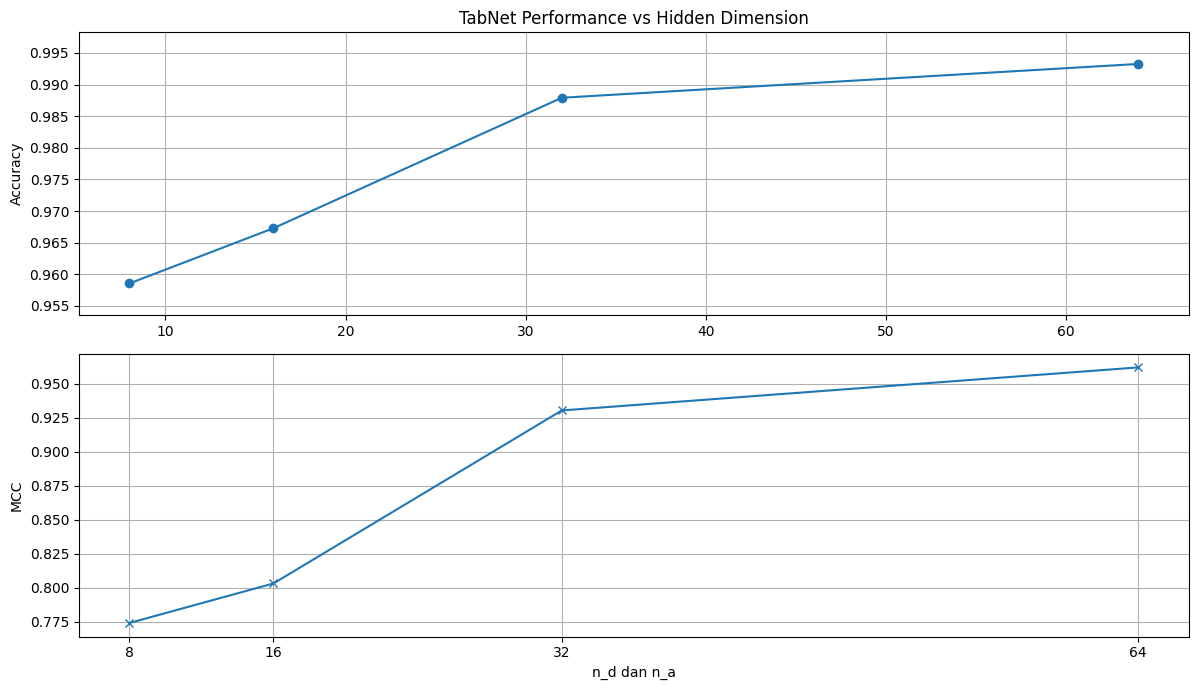

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Accuracy
plt.subplot(2, 1, 1)
plt.plot(n_d_a_list, mean_acc_tabnet, marker='o')
plt.title("TabNet Performance vs Hidden Dimension")
plt.ylabel("Accuracy")
plt.grid(True)
plt.ylim(min(mean_acc_tabnet) - 0.005, max(mean_acc_tabnet) + 0.005)

# MCC
plt.subplot(2, 1, 2)
plt.plot(n_d_a_list, mean_mcc_tabnet, marker='x')
plt.xlabel("n_d dan n_a")
plt.ylabel("MCC")
plt.grid(True)
plt.ylim(min(mean_mcc_tabnet) - 0.01, max(mean_mcc_tabnet) + 0.01)

plt.xticks(n_d_a_list)

plt.tight_layout()
plt.show()